In [13]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float, img_as_ubyte,io

import numpy as np
from matplotlib import pyplot as plt

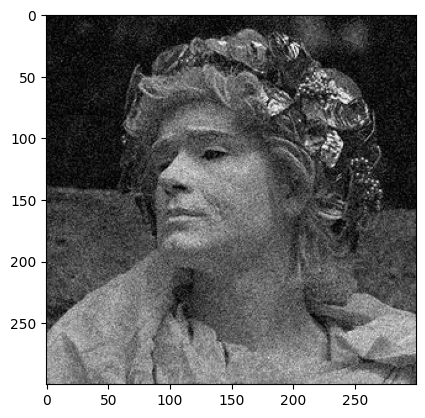

In [14]:
img = img_as_float(io.imread('300px-Kodim17_noisy.jpg'))
plt.imshow(img)

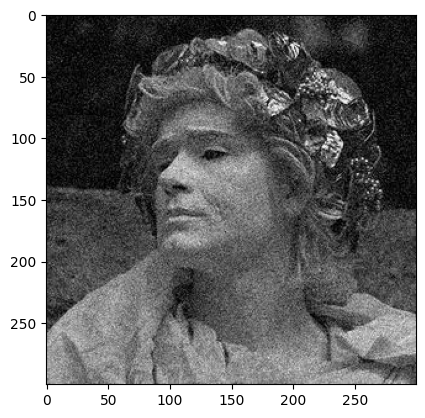

In [40]:
sigma_est = np.mean(estimate_sigma(img, channel_axis=0))

denoise = denoise_nl_means(img, h=4.15*sigma_est, fast_mode=True,patch_size=5,patch_distance=3,channel_axis=0)

denoise_ubyte =img_as_ubyte(denoise)
plt.imshow(denoise_ubyte, cmap='gray')

(array([4932., 1023., 1065., 1350.,    0., 1299., 1389., 1554., 1593.,
           0., 1809., 1704., 1731., 1896.,    0., 1833., 1896., 1848.,
        1956.,    0., 1977., 2013., 1935., 2058.,    0., 1986., 1800.,
        1878., 1887.,    0., 1743., 1824., 1692., 1776.,    0., 1740.,
        1692., 1584., 1668.,    0., 1629., 1464., 1563., 1518.,    0.,
        1545., 1479., 1545., 1548.,    0., 1461., 1593., 1566., 1599.,
           0., 1545., 1500., 1464., 1551.,    0., 1464., 1521., 1584.,
        1620.,    0., 1605., 1584., 1581., 1641.,    0., 1665., 1764.,
        1821., 1713.,    0., 1860., 1758., 1830., 1815.,    0., 1893.,
        1956., 1896., 1842.,    0., 1842., 1977., 1818., 1887.,    0.,
        1944., 2190., 1887., 1698.,    0., 1980., 1950., 1935., 1833.,
        1926.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
        17.6, 18.4, 19.2, 20. , 20.8, 21.6, 22.4, 23.2

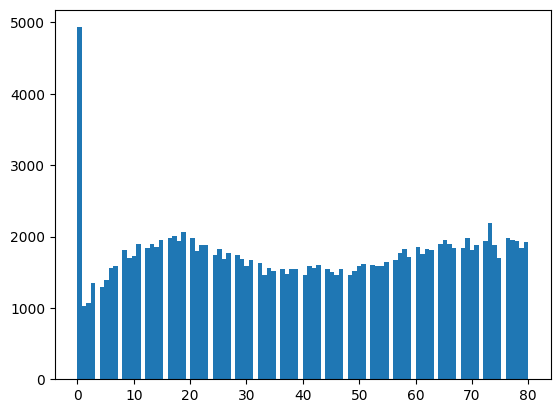

In [41]:
plt.hist(denoise_ubyte.flat, bins=100, range=(0,80))

In [47]:
segm1 = (denoise_ubyte <=55)
segm2 = (denoise_ubyte > 55) & (denoise_ubyte <= 100)
segm3 = (denoise_ubyte > 100) & (denoise_ubyte <= 210)
segm4 = (denoise_ubyte > 210)

all_segments = np.zeros((denoise_ubyte.shape[0], denoise_ubyte.shape[1],3))

all_segments[segm1] = (1,0,0)
all_segments[segm2] = (0,1,0)
all_segments[segm3] = (0,0,1)
all_segments[segm4] = (1,1,0)
plt.imshow(all_segments)

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 95301 output values where the mask is true